# Read data from EHRI WFS

In [27]:
import geopandas as gpd
import requests
import geojson
from pyproj import CRS
from owslib.wfs import WebFeatureService
%matplotlib inline 
import matplotlib.pyplot as plt

In [119]:
def ehri_wfs(layer):
    # EHRI WFS service
    url = "https://geodata.ehri-project.eu/geoserver/wfs"

    # Specify parameters (read data in json format).
    params = dict(
        service="WFS",
        version="2.0.0",
        request="GetFeature",
        typeName=layer,
        outputFormat="json",
        srsName = "EPSG:4326"
    )

    # Fetch data from WFS using requests
    r = requests.get(url, params=params)
    return(gpd.GeoDataFrame.from_features(geojson.loads(r.content), crs="EPSG:3067"))

In [139]:
stolpersteine = ehri_wfs("ehri:STS-stolpersteine_prague-v3_20240715")

In [140]:
districts = ehri_wfs("ehri:MGS-prague_districts_borders-v1")

In [138]:
incidents = ehri_wfs("ehri:MGS-prague_incidents-v1-eng")

In [142]:
inaccessible = ehri_wfs("MGS-prague_inaccessible_places-v1-cze")

<AxesSubplot: >

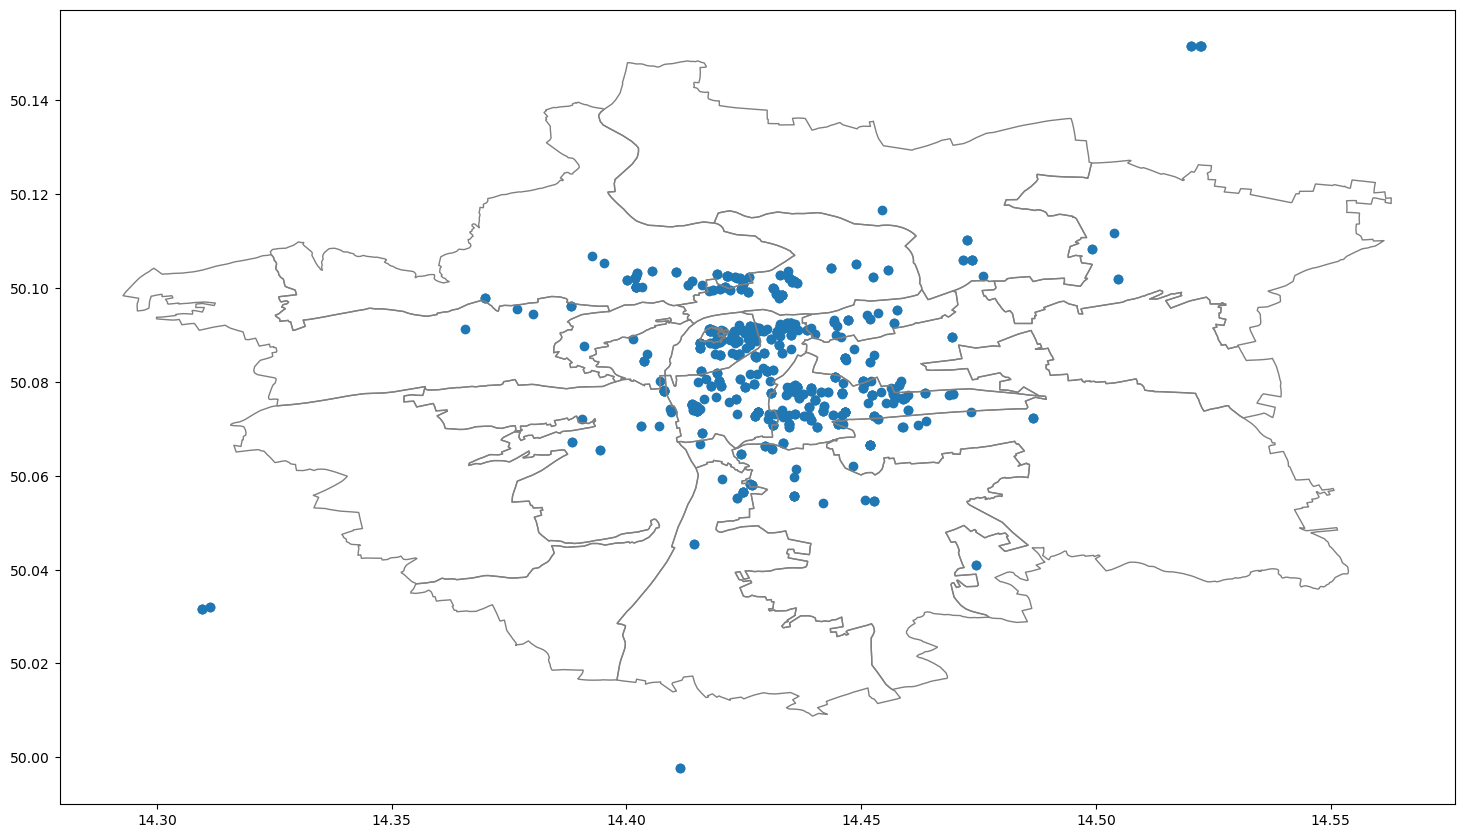

In [141]:
fig, ax = plt.subplots(figsize=(18, 18))
stolpersteine.plot(ax=ax)
districts.plot(facecolor="none", edgecolor='grey', ax=ax)

In [97]:
incidents = ehri_wfs("ehri:MGS-prague_incidents-v1-eng")

In [129]:
districts.total_bounds

array([14.292742, 50.008801, 14.562912, 50.148372])

In [131]:
xmin, ymin, xmax, ymax = districts.total_bounds

In [128]:
incidents

,geometry,label_en,description_en,type_1_en,spec_1_en,type_2_en,spec_2_en,date,place_en,documents_en
0,POINT (14.428 50.085),Eduard Adler: Arrested for violating an anti-J...,None,prohibited public spaces,vicinity of the commodity exhange building,None,None,09.12.1941,"Prague II, Nekázanka",https://www.holocaust.cz/databaze-dokumentu/do...
1,POINT (14.428 50.079),Ervín Adler: Arresting for lacking identity card.,Hadn''t procured the necessary documents. Fine...,personal documents,missing identity card,None,None,22.09.1941,"Prague II, Krakovská 14",https://www.holocaust.cz/databaze-dokumentu/do...
2,POINT (14.453 50.103),Evžen Adler: Arrested for not having his ident...,"Fine of 2,000 crowns or 14 days in jail. Paid ...",personal documents,"letter ""J"" on identity card",None,None,24.04.1941,"Prague VII, Na Maninách 24",https://www.holocaust.cz/databaze-dokumentu/do...
3,POINT (14.456 50.084),Herma Adlerová: Arrested in order to be deported.,"Her permant residence was in Tachov, which was...",regulations for foreigners,expulsion/prohibition of residency,None,None,23.08.1939,"Prague XI, Lupáčova 12",https://www.holocaust.cz/databaze-dokumentu/do...
4,POINT (14.456 50.075),Růžena Adlerová: Arrested for not having her d...,"Fine of 2,000 crowns or 5 days in jail. Paid t...",personal documents,"letter ""J"" on identity card",None,None,19.05.1941,"Prague XII, Sobotecká 9",https://www.holocaust.cz/databaze-dokumentu/do...
...,...,...,...,...,...,...,...,...,...,...
1738,POINT (14.473 50.109),Anna Šípová: Arrested for lacking identity card.,"Fine of 1,000 crowns or 5 days in jail. Went t...",personal documents,missing identity card,None,None,10.11.1941,"Prague VIII, Stejskalova 185",https://www.holocaust.cz/databaze-dokumentu/do...
1739,POINT (14.420 50.076),Jindřich Sylt: Arrested for loitering in the p...,None,prohibited public spaces,parks,None,None,06.11.1941,"Prague II, Karlovo nám.",https://www.holocaust.cz/databaze-dokumentu/do...
1740,POINT (14.419 50.089),Karla Synková: Arrested for lacking identity c...,"Fine of 1,000 crowns or 5 days in jail. Paid t...",personal documents,missing identity card,None,None,10.10.1941,"Prague V, Josefovská 14",https://www.holocaust.cz/databaze-dokumentu/do...
1741,POINT (14.439 50.055),Kurt Ofner: Arrested for not handing over a ra...,None,property,failure to hand in a radio receiver,None,None,24.09.1939,"Prague XIV, Na Veselí 871",https://www.holocaust.cz/databaze-dokumentu/do...


(50.008801, 50.148372)

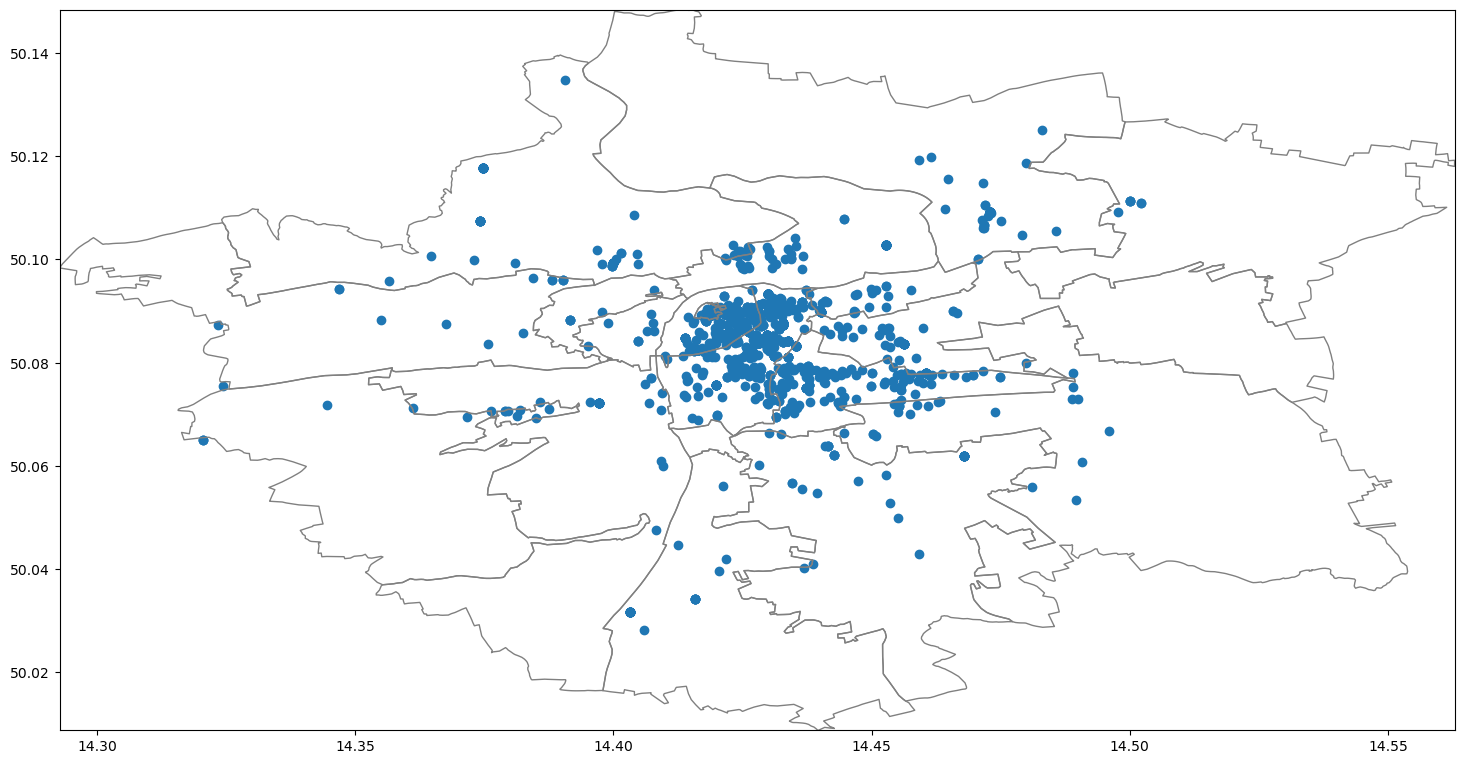

In [133]:
fig, ax = plt.subplots(figsize=(18, 18))
incidents.plot(ax=ax)
districts.plot(facecolor="none", edgecolor='grey', ax=ax)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

In [147]:
incidents.head()

,geometry,label_en,description_en,type_1_en,spec_1_en,type_2_en,spec_2_en,date,place_en,documents_en
0,POINT (14.428 50.085),Eduard Adler: Arrested for violating an anti-J...,None,prohibited public spaces,vicinity of the commodity exhange building,None,None,09.12.1941,"Prague II, Nekázanka",https://www.holocaust.cz/databaze-dokumentu/do...
1,POINT (14.428 50.079),Ervín Adler: Arresting for lacking identity card.,Hadn''t procured the necessary documents. Fine...,personal documents,missing identity card,None,None,22.09.1941,"Prague II, Krakovská 14",https://www.holocaust.cz/databaze-dokumentu/do...
2,POINT (14.453 50.103),Evžen Adler: Arrested for not having his ident...,"Fine of 2,000 crowns or 14 days in jail. Paid ...",personal documents,"letter ""J"" on identity card",None,None,24.04.1941,"Prague VII, Na Maninách 24",https://www.holocaust.cz/databaze-dokumentu/do...
3,POINT (14.456 50.084),Herma Adlerová: Arrested in order to be deported.,"Her permant residence was in Tachov, which was...",regulations for foreigners,expulsion/prohibition of residency,None,None,23.08.1939,"Prague XI, Lupáčova 12",https://www.holocaust.cz/databaze-dokumentu/do...
4,POINT (14.456 50.075),Růžena Adlerová: Arrested for not having her d...,"Fine of 2,000 crowns or 5 days in jail. Paid t...",personal documents,"letter ""J"" on identity card",None,None,19.05.1941,"Prague XII, Sobotecká 9",https://www.holocaust.cz/databaze-dokumentu/do...


<AxesSubplot: >

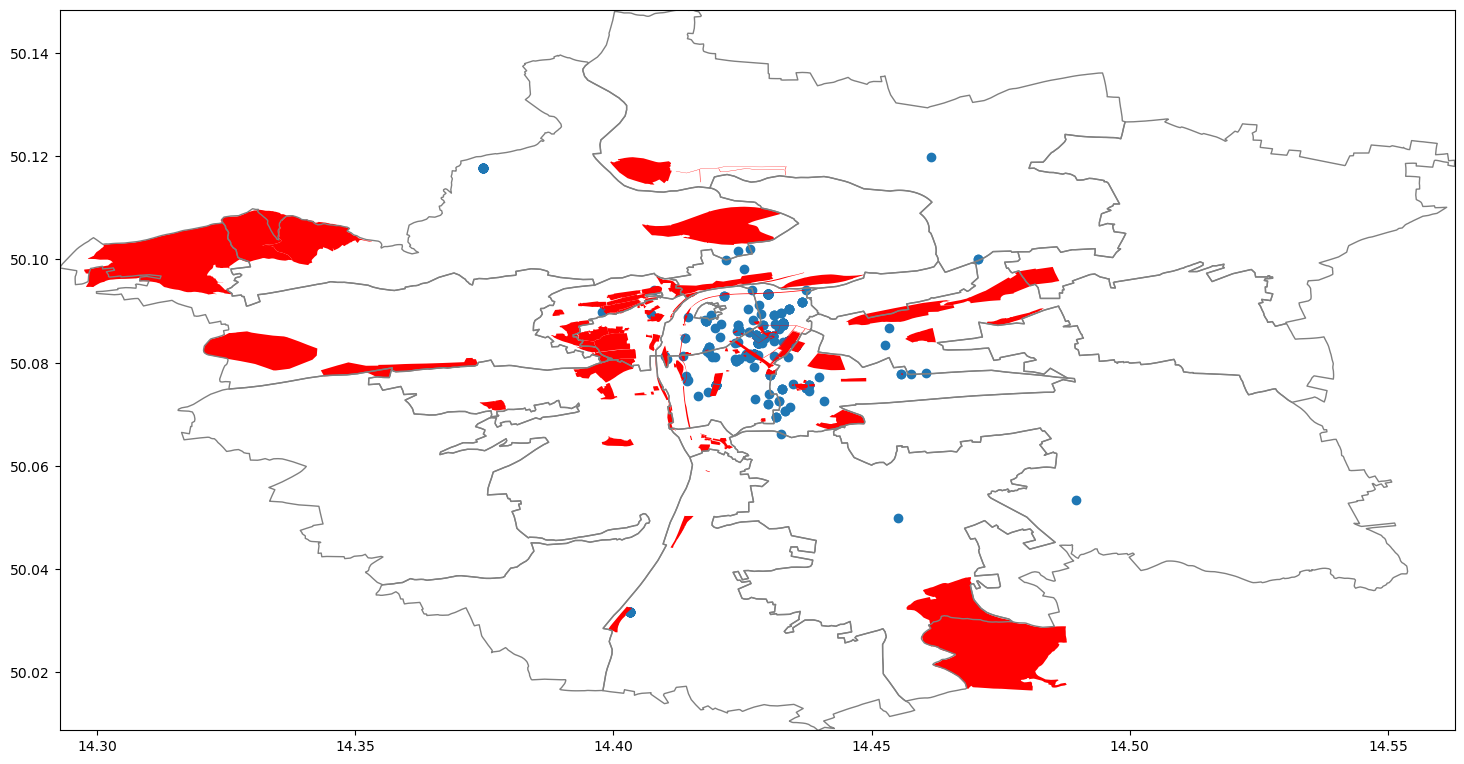

In [148]:
fig, ax = plt.subplots(figsize=(18, 18))
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
incidents[incidents.type_1_en=='prohibited public spaces'].plot(ax=ax)
inaccessible.plot(ax=ax, facecolor="red")
districts.plot(facecolor="none", edgecolor='grey', ax=ax)